In [1]:
# importing libraries and filtering out the warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


### Understanding dataset

In [2]:
# importing dataset and checking first 5 rows

leads_df = pd.read_csv('Leads.csv')
leads = leads_df.copy()
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# checking last 5 rows

leads.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [4]:
# checking shape of the dataset

leads.shape

(9240, 37)

In [5]:
# checking information of the dataset

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Describing the numerical columns

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking duplicate values

In [7]:
# checking for duplicates

sum(leads.duplicated(subset = 'Prospect ID'))

0

In [8]:
sum(leads.duplicated(subset = 'Lead Number'))

0

    As we can see Prospect ID and Lead Number do not have any duplicates they indicate the ID number of the people contacted and thus can be dropped

### Data Cleaning

In [9]:
# Dropping the above two columns

leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [10]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# Replacing the select values with NaN

leads.replace('Select',np.nan,inplace=True)

In [12]:
# checking for null values

leads.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
# checking the percentage of the null values

null_val = round((leads.isna().sum()/len(leads))*100,2)
null_val

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [14]:
# Dropping the columns having null values greater than 40%

drop_col = null_val[null_val.values>40]

In [15]:
len(drop_col)

7

In [16]:
leads.drop(labels = drop_col.index,axis = 1,inplace = True)

In [17]:
leads.shape

(9240, 28)

In [18]:
# Again checking the null values percentage

round((leads.isna().sum()/len(leads))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Handling missing values and performing analysis

### Categorical features 

In [19]:
# Country column

leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

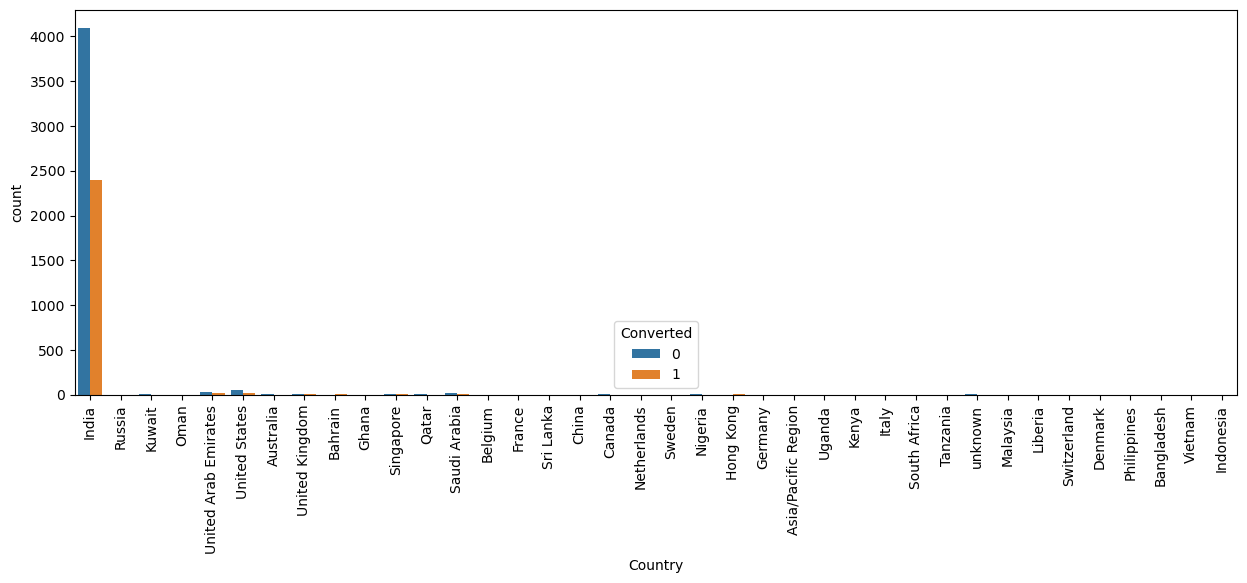

In [20]:
# Visualizing the country column

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads.Country, hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    As we can see that the no.of values for India is quite high so this columns can be dropped (since no variation)

In [21]:
leads.drop('Country',axis = 1, inplace = True)

In [22]:
# City column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
leads['City'].mode()[0]

'Mumbai'

In [24]:
# replacing the missing values in city column with mode i-e 'Mumbai'

leads['City'].replace(np.nan,leads['City'].mode()[0],inplace=True)

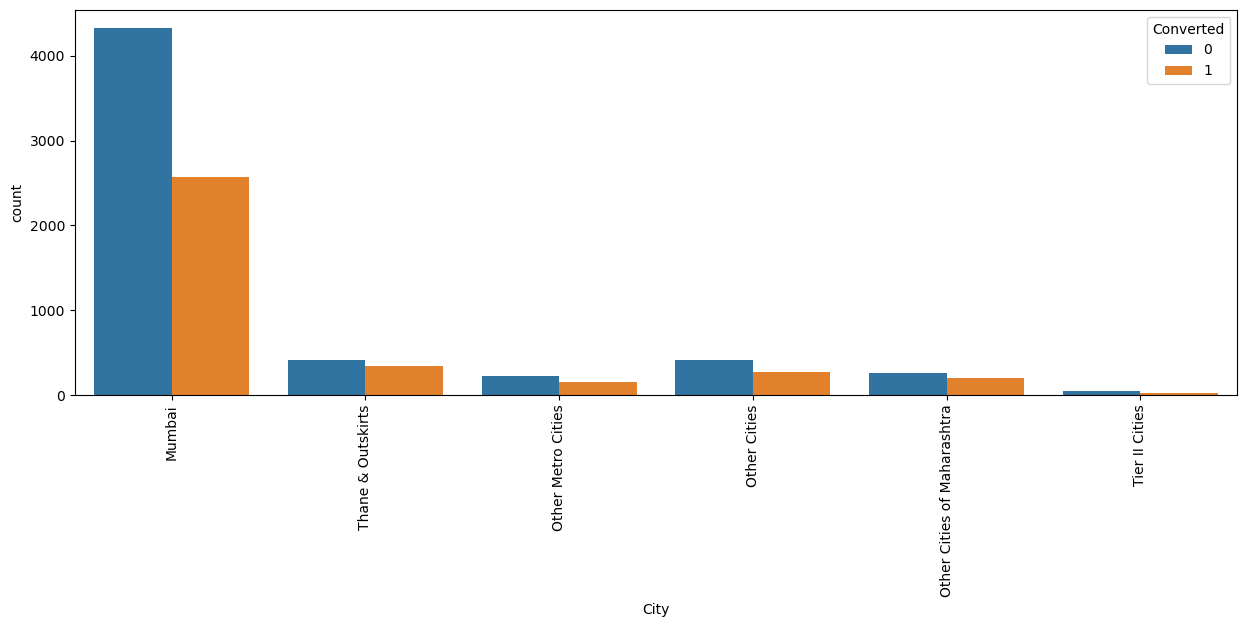

In [25]:
# Visualizing the country column

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads.City, hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [26]:
# Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
# replacing the missing values in Specialization column with 'Not Specified' as lead may not have 
# mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads['Specialization'].replace(np.nan,'Not Specified',inplace=True)

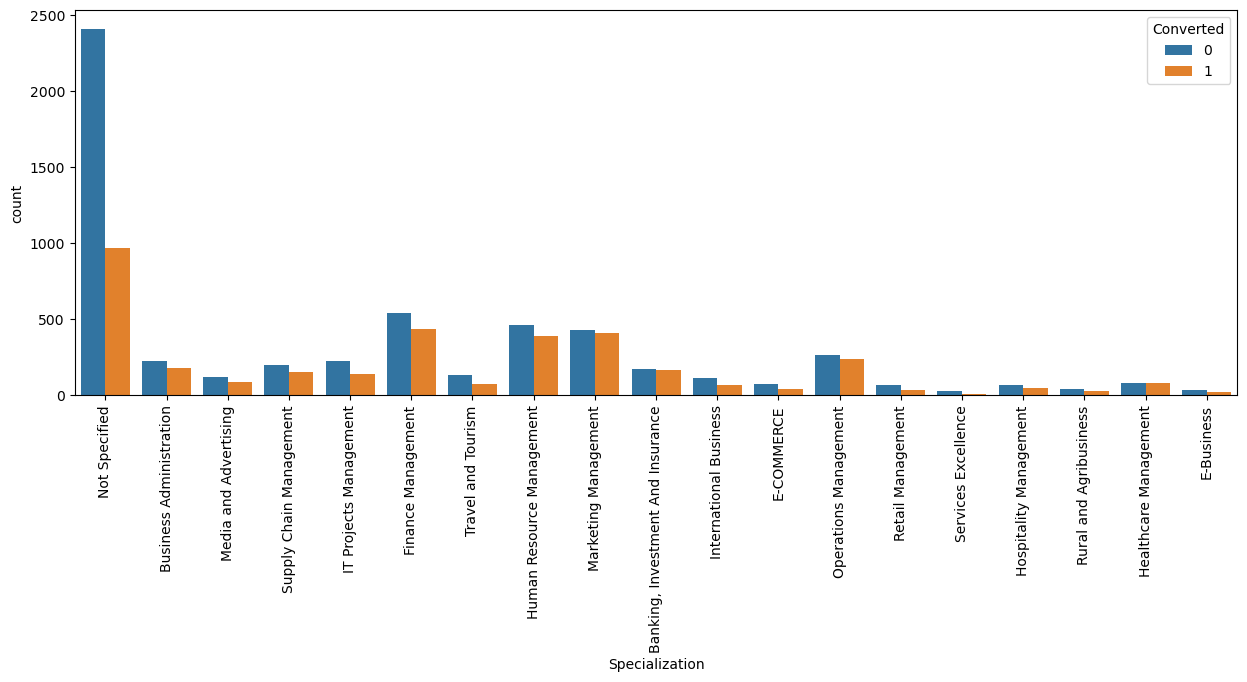

In [28]:
# Visualizing the Specialization column

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads.Specialization, hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    From above graph we see that specialization with Management  in  them  have higher number  of  leads as well as leads converted. So this is definitely a significant variable. 

In [29]:
# combining Management Specializations since they show similar trends and fall under the same category
leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management',
                                 'Operations Management','IT Projects Management','Supply Chain Management',
                                 'Healthcare Management','Hospitality Management','Retail Management'],
                                 'Management', inplace = True)  

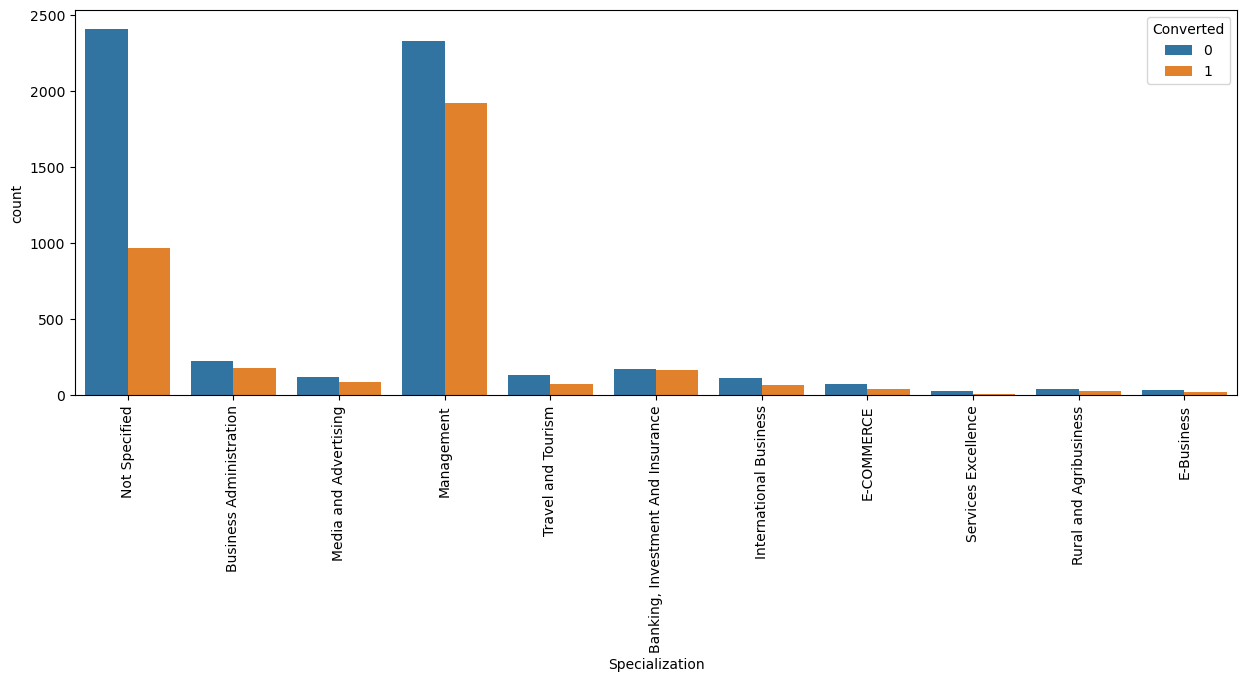

In [30]:
# Visualizing the Specialization column after replacement

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads.Specialization, hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [31]:
# What is your current occupation column

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
leads['What is your current occupation'].mode()[0]

'Unemployed'

In [33]:
# Replacing NaN values with mode "Unemployed"

leads['What is your current occupation'].replace(np.nan, 'Unemployed',inplace=True)

In [34]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

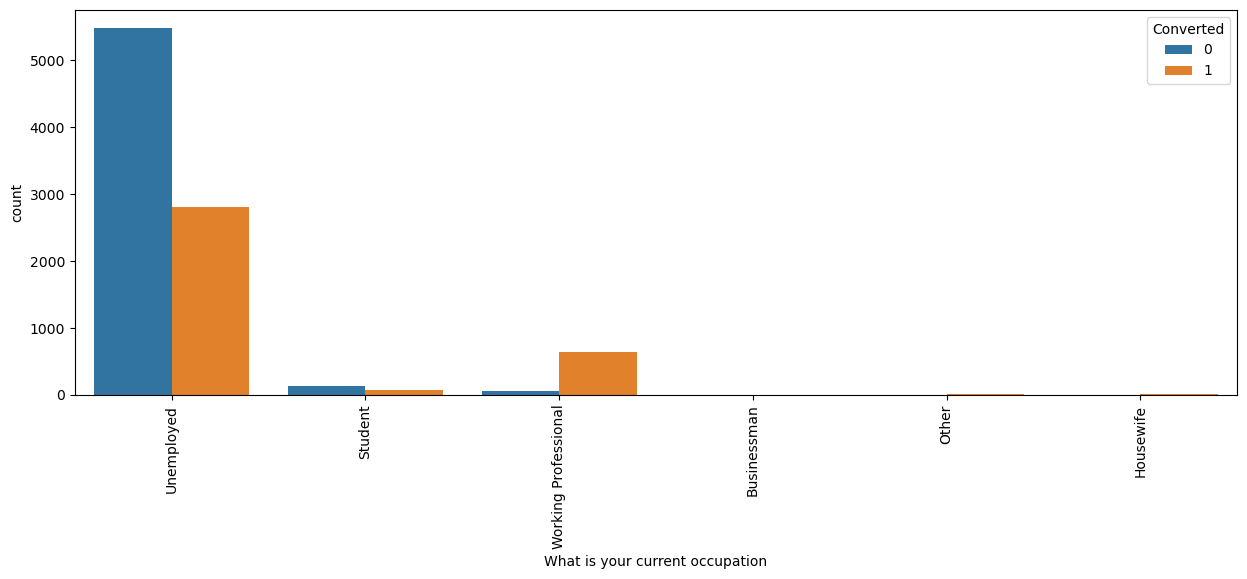

In [35]:
# Visualizing the column after replacement

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['What is your current occupation'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    - Unemployed leads are the most in terms of absolute numbers.
    - Working Professionals have high chances of getting converted.


In [36]:
#checking What matters most to you in choosing a course counts

leads['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

    As  we  can  see  that  there  70%  of  the  values are  'Better Career Prospects' and 29% values are null so replacing null values with mode won't be meaningful so we drop the column

In [37]:
leads.drop('What matters most to you in choosing a course',axis = 1, inplace = True)

In [38]:
#checking Tag column

leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [39]:
#replacing Nan values with "Not Specified"

leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

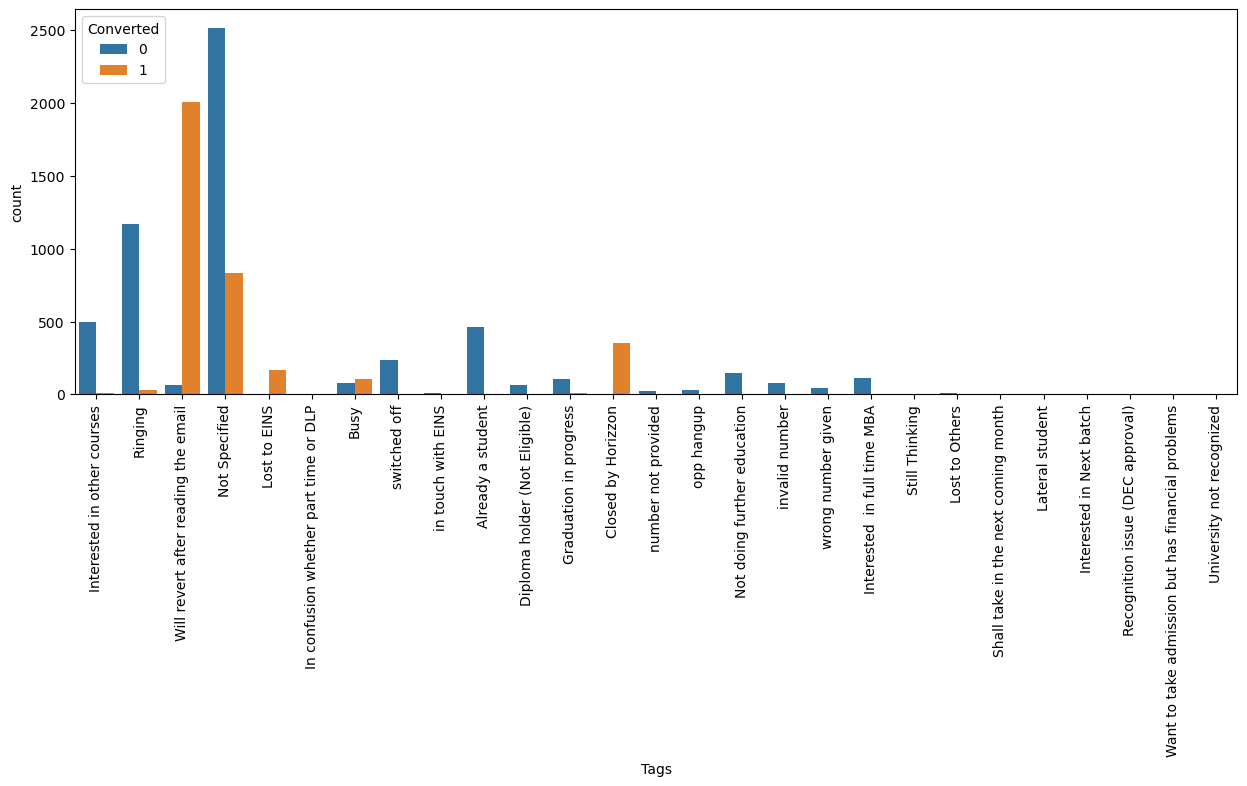

In [40]:
# Visualizing the column after replacement

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['Tags'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [41]:
#replacing tags with low frequency with "Other Tags"

leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                     'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                     'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                     'University not recognized','switched off',
                                     'Already a student',
                                     'Not doing further education',
                                     'invalid number',
                                     'wrong number given',
                                     'Interested  in full time MBA'], 'Other_Tags')

In [42]:
#checking percentage of missing values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [43]:
# checking Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [44]:
# replacing Nan Values with mode and combining low frequency values

leads['Lead Source'] = leads['Lead Source'].replace(np.nan,leads['Lead Source'].mode()[0])

In [45]:
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')

In [46]:
# Combining low frequency values

leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')      

    We can group some of the lower frequency occuring labels under a common label 'Others'

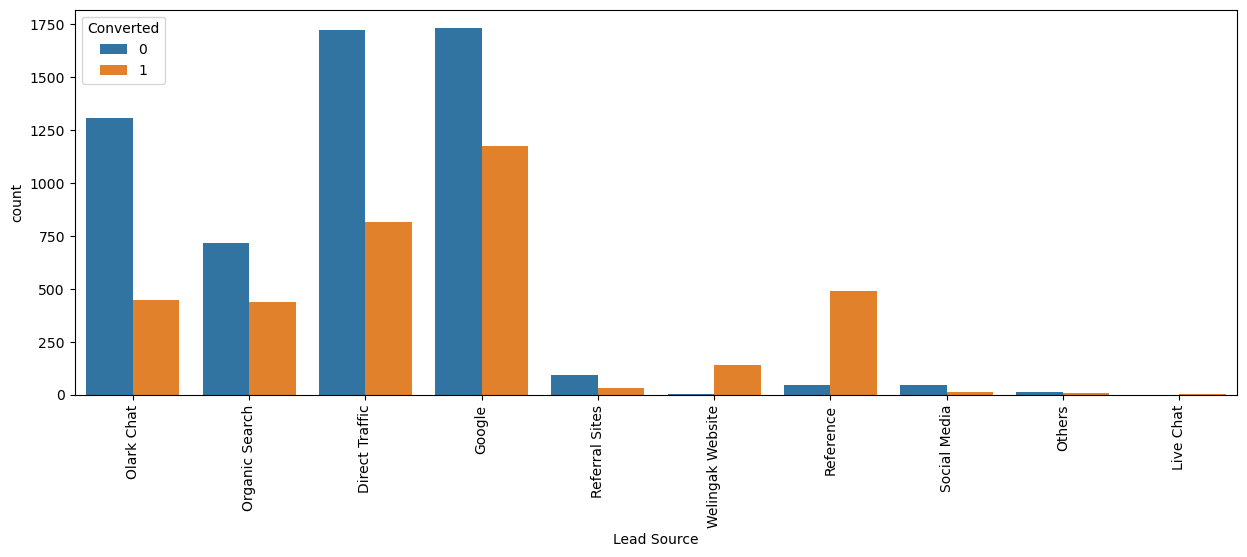

In [47]:
# Visualizing the column after replacement

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['Lead Source'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    Inference
    Maximum number of leads are generated by Google and Direct traffic.
    Conversion Rate of 'Reference leads' and leads through 'Welingak website' is high.
    To improve overall lead conversion rate, focus should be on improving  lead converion of olark  chat,  organic  search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [48]:
# Checking Last Activity column

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [49]:
# replacing Nan Values with mode

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,leads['Last Activity'].mode()[0])

In [50]:
# Combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

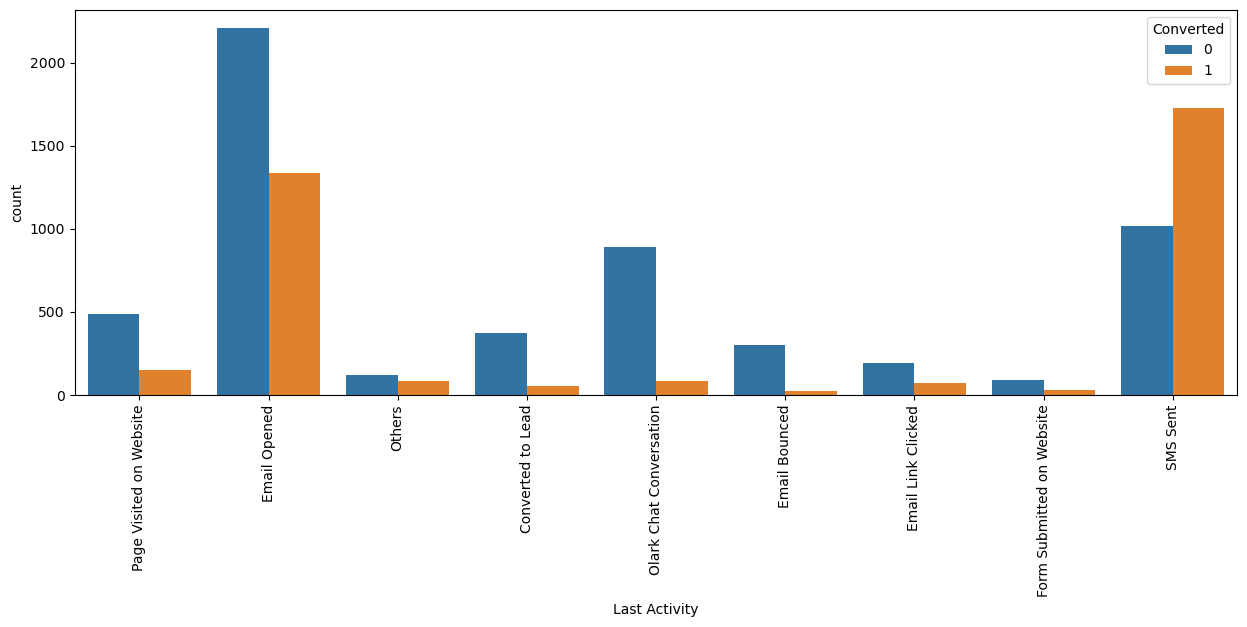

In [51]:
# Visualizing the column after replacement

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['Last Activity'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

### Analyzing remaining categorical features which do not contain null values

In [52]:
# Analyzing Lead Origin column

leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

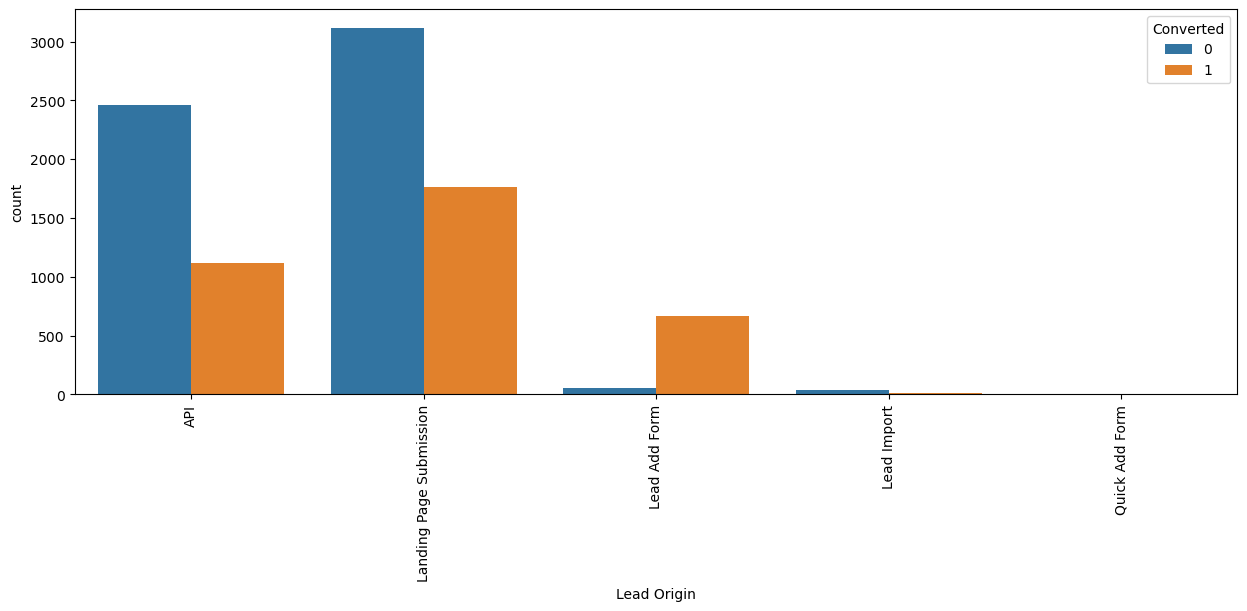

In [53]:
# Visualizing the Lead Origin column

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['Lead Origin'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    Inference
    API and Landing Page Submission bring higher number of leads as well as conversion.
    Lead Add Form has a very high conversion rate but count of leads are not very high.
    Lead Import and Quick Add Form get very few leads.
    In order to improve overall lead conversion rate, we have  to  improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

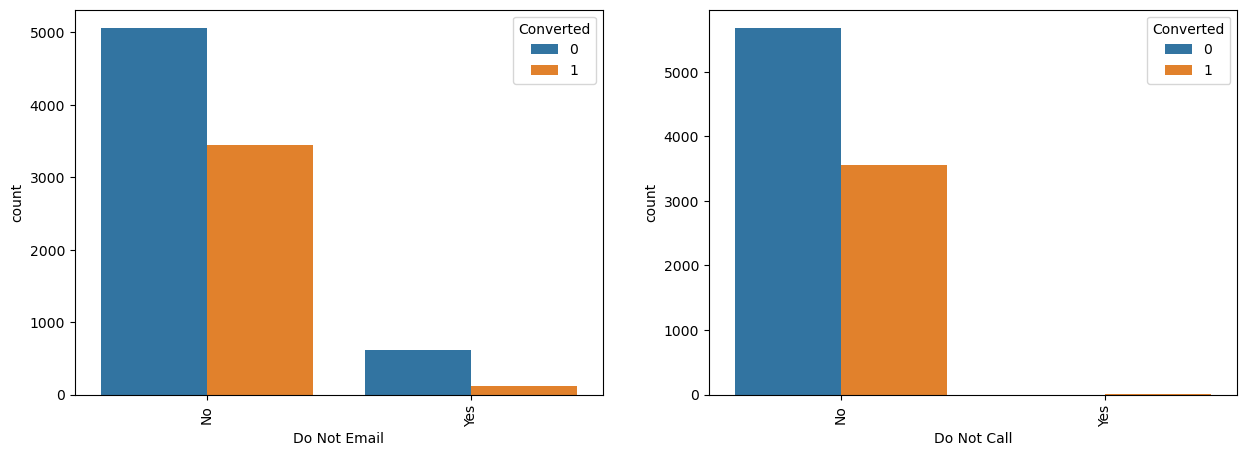

In [54]:
#Analyzing Do Not Email & Do Not Call column
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1 = sns.countplot(leads['Do Not Email'], hue = leads.Converted)
plt.xticks(rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2 = sns.countplot(leads['Do Not Call'], hue = leads.Converted)
plt.xticks(rotation=90)

plt.show()

In [55]:
# checking value counts for Do Not Call

leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [56]:
leads['Do Not Call'].value_counts(normalize = True)*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [57]:
# checking value counts for Do Not Email

leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [58]:
leads['Do Not Email'].value_counts(normalize = True)*100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

    We can drop Do Not Call and Do Not Email column since > 90% is of only one Value

In [59]:
leads.drop(['Do Not Call'],axis=1,inplace=True)

In [60]:
leads.drop(['Do Not Email'],axis=1,inplace=True)

### Checking the imbalanced variables that can be dropped

In [61]:
leads.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [62]:
leads.Magazine.value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [63]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [64]:
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [65]:
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [66]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [67]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [68]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [69]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [70]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [71]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [72]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [73]:
# adding imbalanced columns to the list of columns to be dropped

leads.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [74]:
# checking value counts of last Notable Activity

leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [75]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

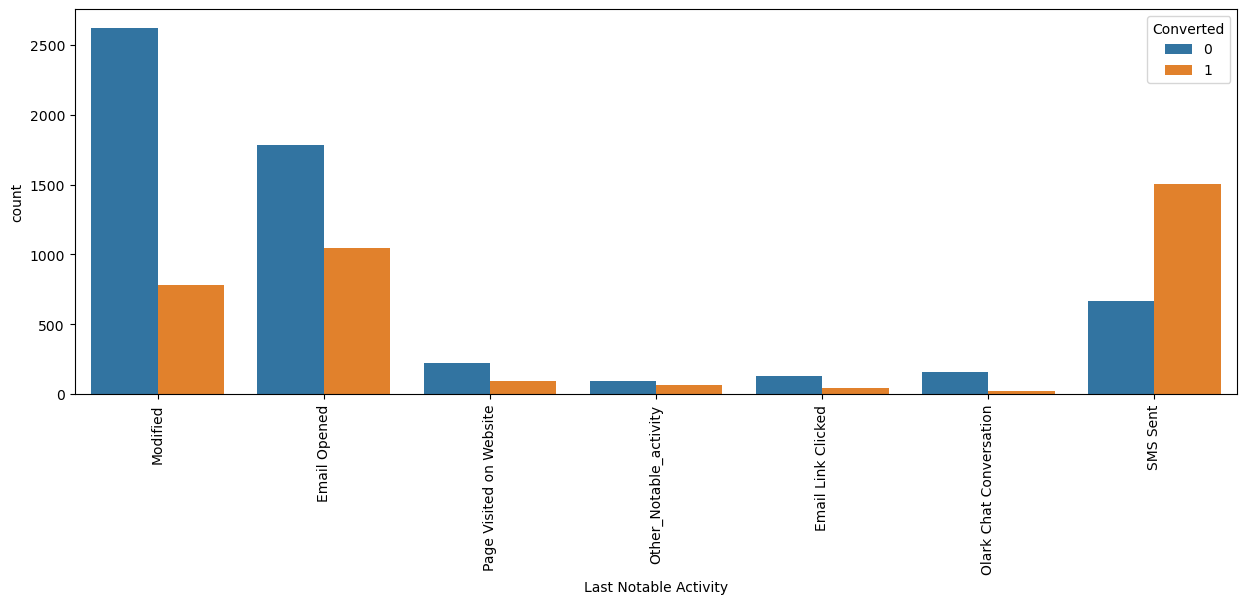

In [76]:
# Visualizing the Last Notable Activity column

plt.figure(figsize=(15,5))
g1 = sns.countplot(leads['Last Notable Activity'], hue = leads.Converted)
plt.xticks(rotation=90)
plt.show()

    Inference
    
    SMS Sent has high conversion rate.
    

In [77]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

### Numerical features

### Handling missing values

In [78]:
#Check the Null Values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [79]:
# Checking TotalVisits column

leads["TotalVisits"].isna().sum()

137

In [80]:
# Replacing the null values with mode

leads["TotalVisits"].replace(np.nan,leads["TotalVisits"].mode()[0],inplace=True)

In [81]:
leads["TotalVisits"].isna().sum()

0

In [82]:
# Checking Page Views Per Visit column

leads["Page Views Per Visit"].isna().sum()

137

In [83]:
leads["Page Views Per Visit"].replace(np.nan,leads["Page Views Per Visit"].mode()[0],inplace=True)

In [84]:
leads["Page Views Per Visit"].isna().sum()

0

In [85]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

    All missing values are handled 

In [86]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.53896103896104

### Handling outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1df9b0ef5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df9b0efb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df9b0ef2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df9ba3a130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df9ba3a400>],
 'means': []}

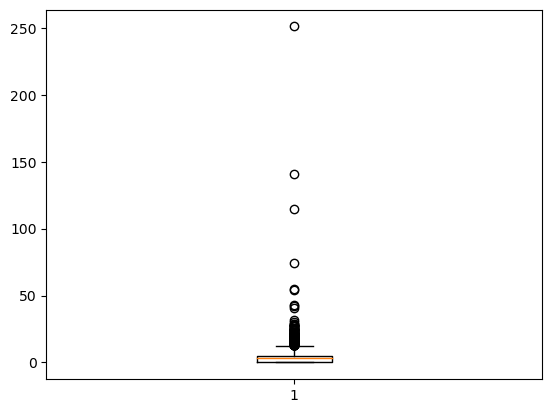

In [87]:
# 1. Total Visits columns

plt.boxplot(x=leads['TotalVisits'])

In [88]:
IQR1 = np.percentile(leads['TotalVisits'],75)-np.percentile(leads['TotalVisits'],25) #upper and lower limit (Q3=Q1)

upper_threshold=np.percentile(leads['TotalVisits'],75)+1.5*IQR1
lower_threshold=np.percentile(leads['TotalVisits'],25)-1.5*IQR1

print("upper_threshold :",upper_threshold)
print("lower_threshold :",lower_threshold)


upper1=np.where([leads['TotalVisits']>upper_threshold])
lower1=np.where([leads['TotalVisits']<lower_threshold])

upper_threshold : 12.5
lower_threshold : -7.5


In [89]:
leads=leads.drop(leads[(leads['TotalVisits']>=upper_threshold)].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x1df9ba8c6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df9ba8cc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df9ba8c400>],
 'medians': [<matplotlib.lines.Line2D at 0x1df9ba9c280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df9ba9c550>],
 'means': []}

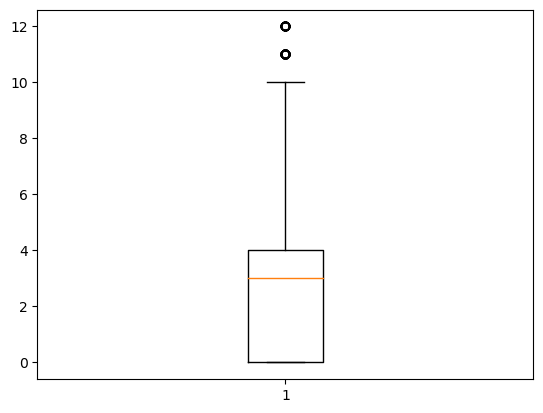

In [90]:
plt.boxplot(x=leads['TotalVisits'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1df9bab08e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df9bab0e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df9bab0610>],
 'medians': [<matplotlib.lines.Line2D at 0x1df9babf490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df9babf760>],
 'means': []}

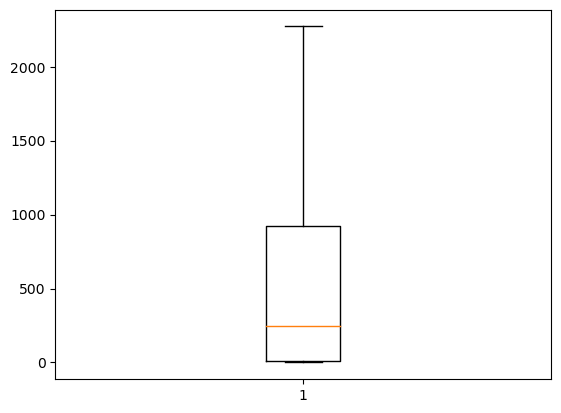

In [91]:
# 2. Total Time Spent on Website

plt.boxplot(x=leads['Total Time Spent on Website'])

    There are no outliers in the above column

In [92]:
IQR2 = np.percentile(leads['Total Time Spent on Website'],75)-np.percentile(leads['Total Time Spent on Website'],25) #upper and lower limit (Q3=Q1)

upper_threshold=np.percentile(leads['Total Time Spent on Website'],75)+1.5*IQR2
lower_threshold=np.percentile(leads['Total Time Spent on Website'],25)-1.5*IQR2

print("upper_threshold :",upper_threshold)
print("lower_threshold :",lower_threshold)


upper2=np.where([leads['Total Time Spent on Website']>upper_threshold])

lower2=np.where([leads['Total Time Spent on Website']<lower_threshold])

upper_threshold : 2298.875
lower_threshold : -1368.125


{'whiskers': [<matplotlib.lines.Line2D at 0x1df9bb19220>,
 'caps': [<matplotlib.lines.Line2D at 0x1df9bb197c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df9bb0bf10>],
 'medians': [<matplotlib.lines.Line2D at 0x1df9bb19d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df9bb29070>],
 'means': []}

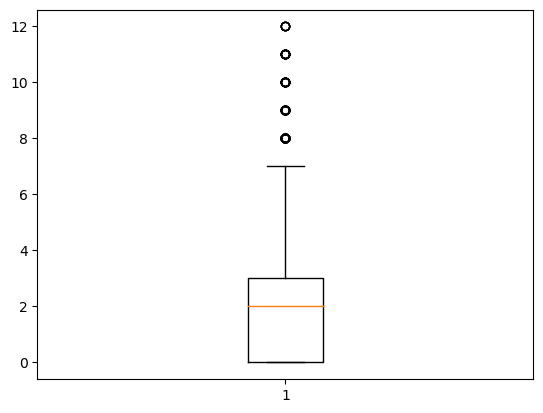

In [93]:
# 3. Page Views Per Visit on Website

plt.boxplot(x=leads['Page Views Per Visit'])

In [94]:
IQR3 = np.percentile(leads['Page Views Per Visit'],75)-np.percentile(leads['Page Views Per Visit'],25) #upper and lower limit (Q3=Q1)

upper_threshold=np.percentile(leads['Page Views Per Visit'],75)+1.5*IQR3
lower_threshold=np.percentile(leads['Page Views Per Visit'],25)-1.5*IQR3

print("upper_threshold :",upper_threshold)
print("lower_threshold :",lower_threshold)


upper3=np.where([leads['Page Views Per Visit']>upper_threshold])
lower3=np.where([leads['Page Views Per Visit']<lower_threshold])


upper_threshold : 7.5
lower_threshold : -4.5


In [95]:
leads=leads.drop(leads[(leads['Page Views Per Visit']>upper_threshold)].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x1df9bb80400>,
 'caps': [<matplotlib.lines.Line2D at 0x1df9bb809a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df9bb80130>],
 'medians': [<matplotlib.lines.Line2D at 0x1df9bb80f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df9bb8d250>],
 'means': []}

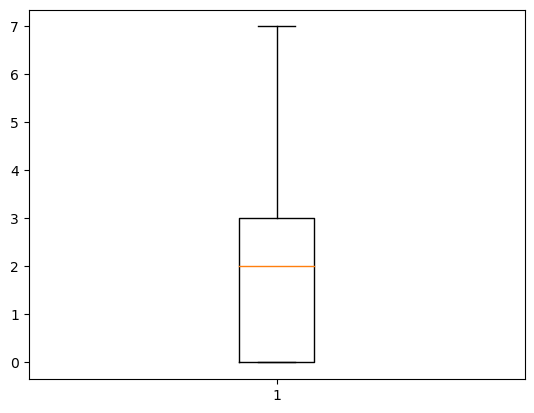

In [96]:
plt.boxplot(x=leads['Page Views Per Visit'])

In [97]:
leads.shape

(8844, 13)

    All the outliers are removed and null values are handled thus now the data is clean

### Analyzing numerical features

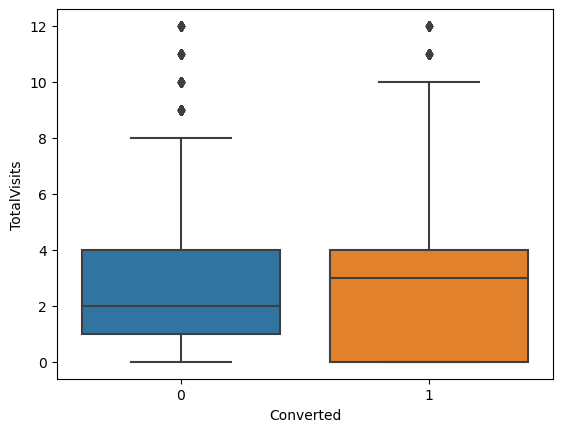

In [98]:
#checking Spread of "Total Visits" vs Converted variable

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

    Inference

    Median for converted and not converted leads are the close.
    Nothing conclusive can be said on the basis of Total Visits

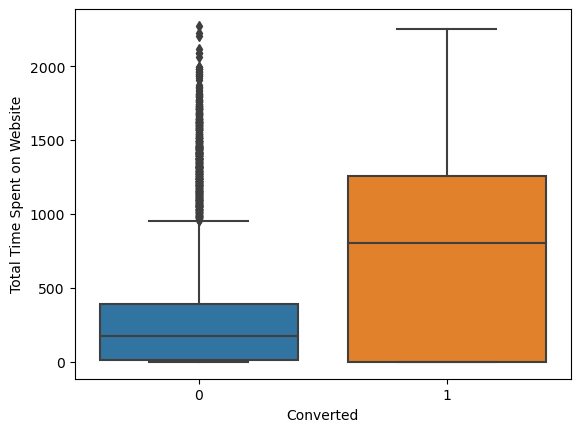

In [99]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

    Inference

    Leads spending more time on the website are more likely to be converted.
    Website should be made more engaging to make leads spend more time.

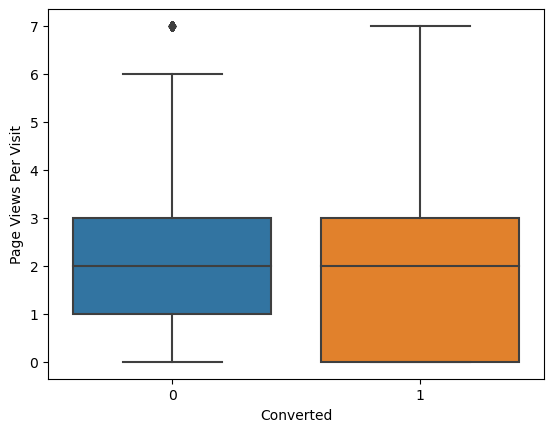

In [100]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

    Inference

    Median for converted and unconverted leads is the same.
    Nothing can be said specifically for lead conversion from Page Views Per Visit

In [101]:
leads.shape

(8844, 13)

In [102]:
leads.isna().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [103]:
leads.info(())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8844 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8844 non-null   object 
 1   Lead Source                             8844 non-null   object 
 2   Converted                               8844 non-null   int64  
 3   TotalVisits                             8844 non-null   float64
 4   Total Time Spent on Website             8844 non-null   int64  
 5   Page Views Per Visit                    8844 non-null   float64
 6   Last Activity                           8844 non-null   object 
 7   Specialization                          8844 non-null   object 
 8   What is your current occupation         8844 non-null   object 
 9   Tags                                    8844 non-null   object 
 10  City                                    8844 non-null   obje

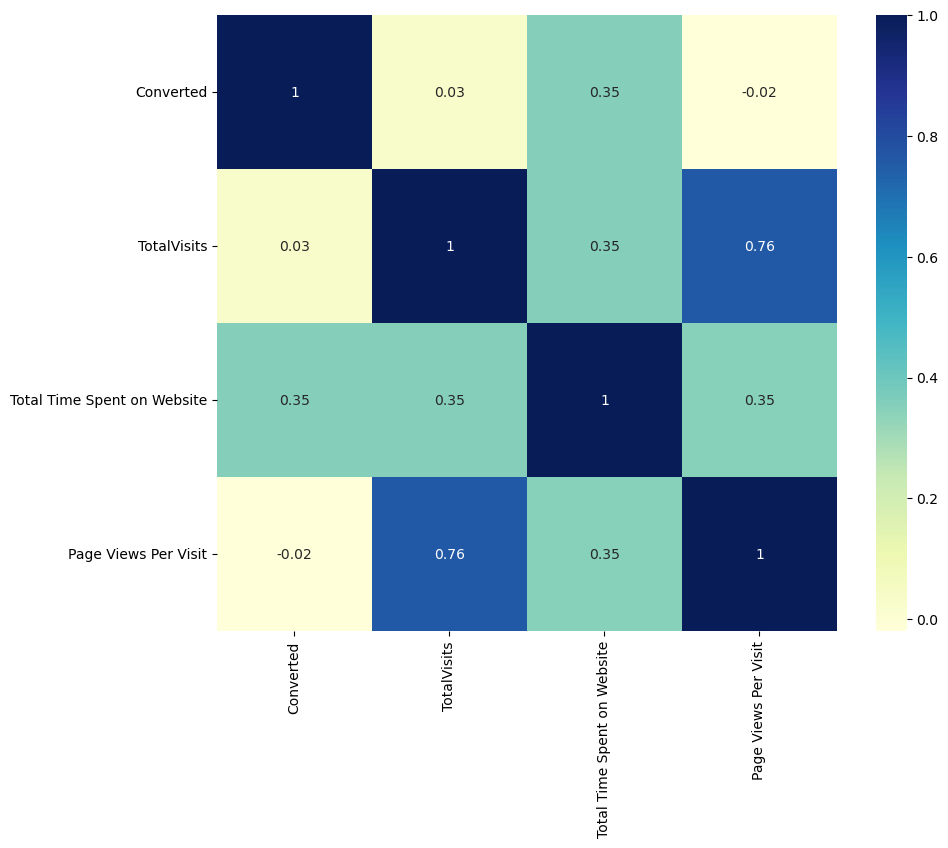

In [104]:
# Checking correlations of numeric values

plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Creating dummy variables

In [105]:
cat_features=leads[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','A free copy of Mastering The Interview','Last Notable Activity']]

In [106]:
# Create dummy variables using the 'get_dummies'

dummy = pd.get_dummies(cat_features, drop_first=True)

In [107]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9237,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9238,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [108]:
# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)
leads

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,Ringing,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,...,0,0,0,1,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,Ringing,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Others,Management,Unemployed,Will revert after reading the email,...,0,0,0,0,0,0,0,1,0,0
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Other_Tags,...,0,0,0,1,0,0,0,0,0,1
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Other_Tags,...,0,0,0,1,0,0,0,0,0,1
9238,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,Management,Unemployed,Not Specified,...,1,0,0,0,0,0,0,0,0,1


In [109]:
leads= leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','A free copy of Mastering The Interview','Last Notable Activity'], 1)
leads

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Live Chat,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9237,0,2.0,199,2.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9238,1,3.0,499,3.00,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


### Splitting the training and testing data

In [110]:
# Independent features

x=leads.drop('Converted',axis=1) 

In [111]:
# Dependent feature

y=leads['Converted']

In [112]:
# Splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Scaling 

In [113]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Model building

In [114]:
# Fitting Logistic Regression to the training set  

from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
model=classifier.fit(x_train, y_train)  

In [115]:
y_pred=model.predict(x_test)

### Model Evaluation

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score

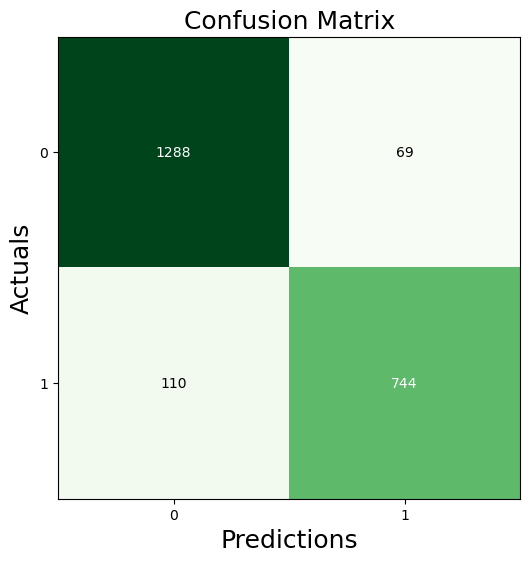

In [117]:
cm = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [118]:
# Substituting the value of true positive
TP = cm[1,1]
# Substituting the value of true negatives
TN = cm[0,0]
# Substituting the value of false positives
FP = cm[0,1] 
# Substituting the value of false negatives
FN = cm[1,0]

In [119]:
# Precision

print("Precision : ",TP / (TP + FP))

Precision :  0.915129151291513


In [120]:
# Recall or Sensitivity

print("Recall : ",TP / (TP+ FN))

Recall :  0.8711943793911007


In [121]:
# Specificity

print("Specificity :",TN / (TN+FP))

Specificity : 0.9491525423728814


In [122]:
accuracy_score(y_pred,y_test)

0.919041157847128

In [123]:
# Finding out the coefficient of each feature so that we can find importance of features

In [124]:
Coefficient = pd.DataFrame(data={
    'Column Name': list(x.columns),
    'Coeficient': model.coef_[0]
})
Coefficient = Coefficient.sort_values(by='Coeficient', ascending=False)

In [125]:
Coefficient.head(20)

,Column Name,Coeficient
45,Tags_Will revert after reading the email,1.489334
39,Tags_Closed by Horizzon,1.228866
1,Total Time Spent on Website,1.008119
57,Last Notable Activity_SMS Sent,0.869245
23,Last Activity_SMS Sent,0.748645
41,Tags_Lost to EINS,0.672176
4,Lead Origin_Lead Add Form,0.536421
52,Last Notable Activity_Email Opened,0.494698
15,Lead Source_Welingak Website,0.486325
9,Lead Source_Olark Chat,0.429010


In [126]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1357
           1       0.92      0.87      0.89       854

    accuracy                           0.92      2211
   macro avg       0.92      0.91      0.91      2211
weighted avg       0.92      0.92      0.92      2211



### Assigining lead score to the customers

In [243]:
converted_prob = pd.DataFrame(model.predict_proba(x_test)*100)
converted_prob.drop(0,axis=1,inplace=True)
converted_prob=converted_prob.round()

In [244]:
# Renaming the column 

converted_prob= converted_prob.rename(columns={ 1 : 'Lead Score'})

In [245]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [246]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [247]:
# Converting y_test to dataframe

y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.rename(columns={ 0 : 'Final_Predicted'})

In [248]:
# Removing index for y_pred_df and y_test_dfdataframes

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [249]:
Probability = pd.DataFrame(model.predict_proba(x_test)*100)
Probability.drop(0,axis=1,inplace=True)
Probability = Probability.rename(columns={ 1 : 'Probability'})

In [250]:
# Appending Lead Number, y_test_df, Probability, y_pred_df, Lead Score dataframes

y_pred_final = pd.concat([y_test_df,Probability,y_pred_df,converted_prob],axis=1)

In [251]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Probability','Final_Predicted','Lead Score'])

In [256]:
y_pred_final.head(10)

,Prospect ID,Converted,Probability,Final_Predicted,Lead Score
0,498,0,6.931112,0,7.0
1,5521,0,2.449663,0,2.0
2,8249,0,11.066909,0,11.0
3,3392,0,31.294608,0,31.0
4,3724,0,2.298495,0,2.0
5,6065,1,22.439813,0,22.0
6,7926,0,2.574961,0,3.0
7,6546,1,99.997287,1,100.0
8,4942,1,99.858623,1,100.0
9,2843,0,0.164605,0,0.0


### Finding out the leads which should be contacted (Hot leads)

In [262]:
hl = y_pred_final.copy()
bins = [0,10,20,30,40,50,60,70,80,90,100]
ranges = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
hl['Lead Score'] = pd.cut(hl['Lead Score'],bins,labels=ranges)
hl.groupby(['Lead Score']).size()

Lead Score
0-10      758
10-20     116
20-30     134
30-40      29
40-50      36
50-60      39
60-70      34
70-80      63
80-90      71
90-100    604
dtype: int64

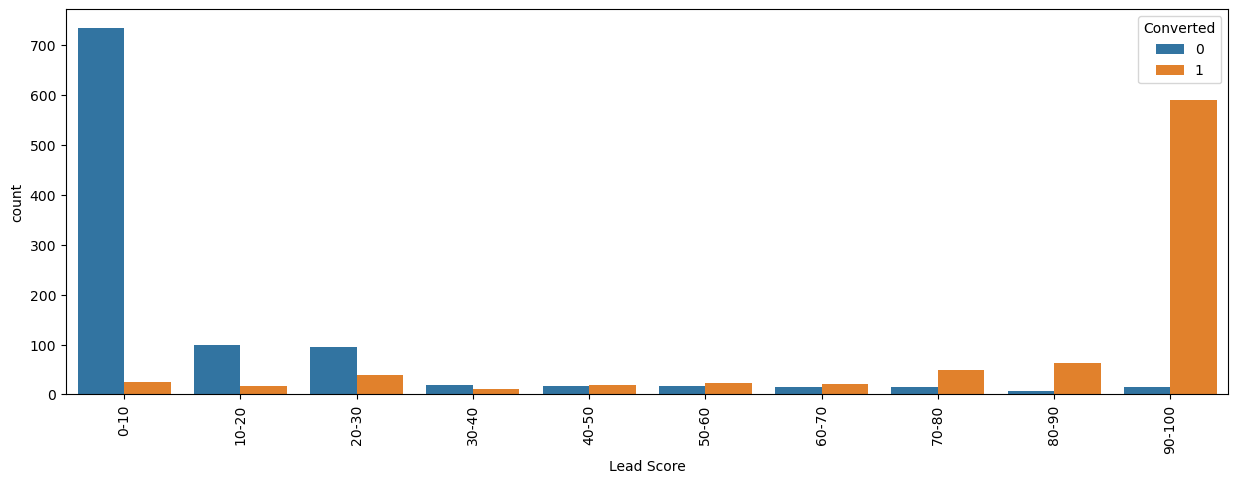

In [277]:
plt.figure(figsize=(15,5))
g1 = sns.countplot(hl['Lead Score'], hue = hl.Converted)
plt.xticks(rotation=90)
plt.show()

    From the above graph we can conclude the following:
    
    The customers which should be contacted are the customers whose "Lead Score"  is  equal  to or greater than 80 as they  have a high probability of getting converted. 
    So, they can be termed as 'Hot Leads'.

In [260]:
hot_leads=y_pred_final.loc[y_pred_final["Lead Score"]>=80]
hot_leads.head(10)

,Prospect ID,Converted,Probability,Final_Predicted,Lead Score
7,6546,1,99.997287,1,100.0
8,4942,1,99.858623,1,100.0
10,5131,1,99.609389,1,100.0
12,5560,1,99.412882,1,99.0
14,9130,1,95.461864,1,95.0
17,7214,1,99.902407,1,100.0
19,8304,1,99.585481,1,100.0
28,7773,1,88.296801,1,88.0
34,5991,1,97.901310,1,98.0
35,2019,1,98.254828,1,98.0


In [257]:
hot_leads.shape

(678, 5)

    So there are 678 leads which can be contacted and have a high chance of getting converted. 
    The Prospect ID of the customers to be contacted are given in the table.